In [38]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

medical_data = pd.read_csv("/content/output.csv")



array([[<Axes: title={'center': ' '}>,
        <Axes: title={'center': 'Arrests per 1,000 Residents'}>,
        <Axes: title={'center': 'PopEst Total Population'}>,
        <Axes: title={'center': 'Education Spending per Student'}>],
       [<Axes: title={'center': 'Per Capita Income'}>,
        <Axes: title={'center': 'Per Capita Income Maintenance Benefits'}>,
        <Axes: title={'center': 'Per Job Income'}>,
        <Axes: title={'center': 'Children in Poverty'}>],
       [<Axes: title={'center': 'Population in Poverty'}>,
        <Axes: title={'center': 'Unemployment Rate'}>,
        <Axes: title={'center': 'Uninsured Children'}>,
        <Axes: title={'center': 'Uninsured Population2'}>],
       [<Axes: title={'center': 'Voter Turnout2'}>,
        <Axes: title={'center': 'Cost Burdened Households'}>,
        <Axes: title={'center': 'Home Ownership Rate'}>,
        <Axes: title={'center': 'Working Age'}>],
       [<Axes: title={'center': 'Working Age Population w/ a Bachelor Degr

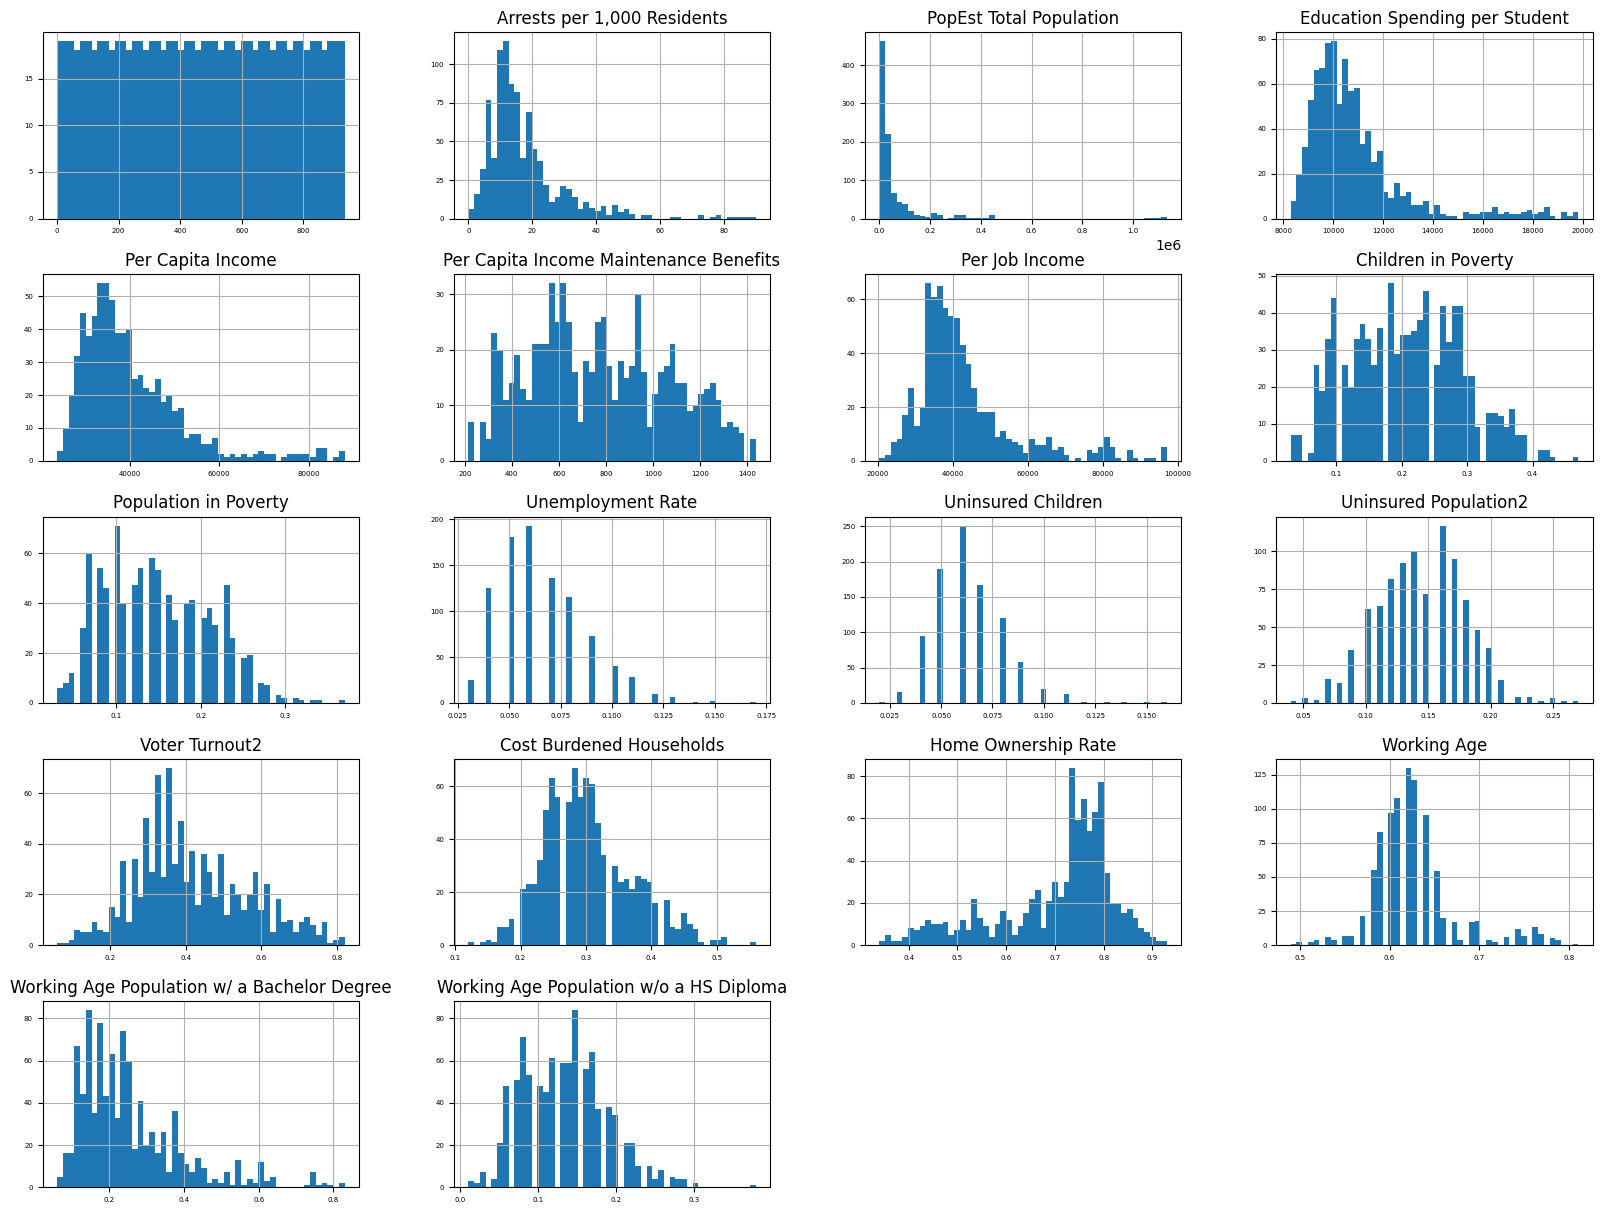

In [39]:
import matplotlib.pyplot as plt
medical_data.hist(bins=50, figsize=(20,15), xlabelsize=5, ylabelsize=5)

In [40]:
medical_data = medical_data.drop(medical_data.columns[0],axis=1)
m = medical_data.drop(["House Election","Locality, Local Health District","Presidential Election","Senate Election","VA Election"],axis=1)
c_matrix = m.corr()
c_matrix["Voter Turnout2"]

,Voter Turnout2
"Arrests per 1,000 Residents",-0.207388
PopEst Total Population,0.043786
Education Spending per Student,0.146140
Per Capita Income,0.259770
Per Capita Income Maintenance Benefits,-0.241928
Per Job Income,0.021449
Children in Poverty,-0.245521
Population in Poverty,-0.302168
Unemployment Rate,-0.266141
Uninsured Children,0.025403


In [41]:
import sklearn
isIncomplete = medical_data[medical_data.isnull().any(axis=1)].head()
isIncomplete

,"Arrests per 1,000 Residents",House Election,"Locality, Local Health District",PopEst Total Population,Presidential Election,Senate Election,VA Election,Education Spending per Student,Per Capita Income,Per Capita Income Maintenance Benefits,...,Population in Poverty,Unemployment Rate,Uninsured Children,Uninsured Population2,Voter Turnout2,Cost Burdened Households,Home Ownership Rate,Working Age,Working Age Population w/ a Bachelor Degree,Working Age Population w/o a HS Diploma
2,36.0,True,"Lynchburg City, Central Virginia",73726,False,False,False,10735.0,NaN,NaN,...,0.23,0.08,0.06,0.17,0.30,0.33,0.56,0.66,0.30,0.13
7,NaN,True,"Bedford City, Central Virginia",6177,False,False,False,NaN,NaN,NaN,...,0.17,0.10,0.06,0.16,0.40,0.35,0.67,0.58,0.24,0.11
8,25.0,True,"Charlottesville City, Thomas Jefferson",42267,False,False,False,16141.0,NaN,NaN,...,0.20,0.06,0.07,0.18,0.39,0.42,0.41,0.75,0.49,0.12
28,21.0,True,"Williamsburg City, Peninsula",13421,False,False,False,NaN,NaN,NaN,...,0.19,0.10,0.07,0.18,0.30,0.34,0.50,0.76,0.41,0.06
32,12.0,True,"Poquoson City, Peninsula",12099,False,False,False,8814.0,NaN,NaN,...,0.05,0.06,0.06,0.11,0.49,0.28,0.85,0.60,0.40,0.04


In [64]:
from typing_extensions import dataclass_transform
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

mean = medical_data["Voter Turnout2"].mean()
medical_data["Voter Turnout2"].fillna(mean)

train_set, test_set = train_test_split(medical_data, test_size=0.2, random_state=42)


train_set_labels = train_set["Voter Turnout2"].copy()
train_set = train_set.drop("Voter Turnout2",axis=1)
test_set_labels = test_set["Voter Turnout2"].copy()
test_set = test_set.drop("Voter Turnout2", axis=1)
num_attribs = list(train_set.select_dtypes(include=['int64', 'float64']))
cat_attribs = list(train_set.select_dtypes(include=['object', 'category']))

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),

        ('std_scaler', StandardScaler()),
    ])
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(medical_data)

test_set_prepared = full_pipeline.transform(test_set)
train_set_prepared = full_pipeline.transform(train_set)

In [57]:
train_set_labels.isnull().sum()

1

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, train_set_prepared, train_set_labels, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [0.15544066 0.14751408 0.14344241 0.151668   0.15571884]
Mean: 0.15075679745276885
Standard deviation: 0.004720300998962829


In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg_scores = cross_val_score(lin_reg, train_set_prepared, train_set_labels, scoring="neg_mean_squared_error", cv=5)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [0.14919222 0.15467585 0.14143992 0.15114532 0.16538117]
Mean: 0.1523668964937804
Standard deviation: 0.007818853663415873


In [71]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf_scores = cross_val_score(clf, train_set_prepared, train_set_labels, scoring="neg_mean_squared_error", cv=5)
clf_rmse_scores = np.sqrt(-clf_scores)
display_scores(clf_rmse_scores)

Scores: [0.22284972 0.19869071 0.1837335  0.20585556 0.18215525]
Mean: 0.19865694952752083
Standard deviation: 0.01504743417922743


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 50], 'max_features': [2, 4, 6, 8,120]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_forest.fit(test_set_prepared, test_set_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 120],
                          'n_estimators': [3, 10, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100,110,120,125,150,180]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(test_set_prepared, test_set_labels)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 110, 120, 125, 150,
                                   180]})

In [86]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
tree_reg = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_set_prepared, train_set_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [94]:
Random_forest_error = grid_search_forest.best_score_
Random_forest_error = np.sqrt(-Random_forest_error)
Random_forest_error

0.14794203445617718

In [90]:
Linear_regression_error = np.sqrt(-lin_reg_scores.min())
Linear_regression_error

0.16538117112884954

In [95]:
tree_error = np.sqrt(-grid_search.best_score_)
tree_error

0.15119935015933397